## 📦 Installation (Run This First)

**Important:** Run this cell first to install all required dependencies.

In [1]:
# ===================================================================
# INSTALL REQUIRED LIBRARIES
# ===================================================================
# WHY: Ensures all dependencies are available before running analysis
#      This cell installs packages if they're not already installed

import sys
import subprocess

def install_package(package):
    """Install a package using pip"""
    subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--quiet"])

# List of required packages
required_packages = [
    'pandas>=2.0.0',
    'numpy>=1.24.0',
    'matplotlib>=3.7.0',
    'seaborn>=0.12.0',
    'scikit-learn>=1.3.0',
    'openpyxl>=3.0.0'  # For reading Excel files
]

print("Installing required packages...")
for package in required_packages:
    try:
        install_package(package)
        print(f"✓ {package.split('>=')[0]} installed/verified")
    except Exception as e:
        print(f"❌ Failed to install {package}: {e}")

print("\n✓ All packages ready!")
print("You can now run the rest of the notebook.")

Installing required packages...
✓ pandas installed/verified
✓ numpy installed/verified
✓ matplotlib installed/verified
✓ seaborn installed/verified
✓ scikit-learn installed/verified
✓ openpyxl installed/verified

✓ All packages ready!
You can now run the rest of the notebook.


# Adani AI Labs – Energy Consumption Forecasting
## Exploratory Data Analysis & Model Development

**Objective:** Understand the data characteristics, patterns, and build a robust forecasting model.

**Approach:** Classical ML with time-aware best practices

---

## 1. Setup & Imports

In [2]:
# ===================================================================
# STEP 1: Import Essential Libraries
# ===================================================================
# WHY: We need data manipulation, numerical computation, and visualization tools
#      for exploratory data analysis (EDA) of time-series energy data.

# Core data manipulation libraries
import pandas as pd          # For time-series data handling and analysis
                             # WHY: Best tool for datetime indexing and tabular data
import numpy as np           # For numerical operations and array computations
                             # WHY: Efficient mathematical operations on large datasets

# Visualization libraries
import matplotlib.pyplot as plt  # For creating plots and charts
                                 # WHY: Standard plotting library with full customization
import seaborn as sns            # For statistical visualizations
                                 # WHY: Beautiful, high-level statistical plots

# Utility libraries
from pathlib import Path     # For cross-platform file path handling
                             # WHY: Works on Windows, Linux, macOS without modification
import warnings              # For suppressing non-critical warnings
                             # WHY: Keeps output clean and focused on results

# ===================================================================
# CONFIGURATION SETTINGS
# ===================================================================
# Suppress warnings to keep output clean
# WHY: FutureWarnings and DeprecationWarnings don't affect our analysis
warnings.filterwarnings('ignore')

# Set professional plotting style
# WHY: 'seaborn-v0_8-darkgrid' provides clean, publication-quality visualizations
plt.style.use('seaborn-v0_8-darkgrid')

# Use color palette optimized for distinguishing multiple categories
# WHY: 'husl' palette ensures colors are perceptually distinct
sns.set_palette("husl")

# Configure pandas display settings for better data visibility
# WHY: Show all columns without truncation during exploration
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', 100)      # Display up to 100 rows

print("✓ All imports successful")
print("✓ Environment configured for time-series analysis")

✓ All imports successful
✓ Environment configured for time-series analysis


## 2. Load Data

In [3]:
# ===================================================================
# STEP 2: Load Raw Energy Consumption Data
# ===================================================================
# WHY: Before any analysis, we must load the dataset and verify its integrity.
#      This step ensures the data file exists and is readable.

# Define the path to the CSV data file
# WHY: Using Path() instead of strings ensures cross-platform compatibility
data_path = Path("../data/energy_consumption_raw.csv")

# Check if the file exists before attempting to load
# WHY: Prevents cryptic errors and provides clear feedback to the user
if not data_path.exists():
    print(f"❌ Data file not found at {data_path}")
    print("Please ensure the file is in the correct location.")
else:
    # Load the CSV file into a pandas DataFrame
    # WHY: read_csv() intelligently parses CSV files and infers data types
    df = pd.read_csv(data_path)
    
    # Display summary statistics about the loaded data
    print(f"✓ Data loaded successfully: {len(df):,} records")
    print(f"  Columns: {list(df.columns)}")
    print(f"  Shape: {df.shape}")
    # WHY: Immediate feedback confirms successful loading and shows data dimensions

✓ Data loaded successfully: 52,966 records
  Columns: ['Start time UTC', 'End time UTC', 'Electricity consumption (MWh)']
  Shape: (52966, 3)


## 3. Initial Data Exploration

In [4]:
# ===================================================================
# STEP 3A: Inspect First and Last Rows
# ===================================================================
# WHY: Viewing the beginning and end of the dataset helps us:
#      1. Understand the data structure and column names
#      2. Verify the time range of the data
#      3. Spot any obvious formatting issues

print("First 5 rows:")
display(df.head())  # WHY: Shows the earliest records in chronological order

print("\nLast 5 rows:")
display(df.tail())  # WHY: Shows the most recent records

print("\nData Info:")
df.info()  # WHY: Displays column types, non-null counts, and memory usage
           # This is CRITICAL for identifying missing values and data types

First 5 rows:


,Start time UTC,End time UTC,Electricity consumption (MWh)
0,2015-12-31 21:00:00,2015-12-31 22:00:00,10800
1,2015-12-31 22:00:00,2015-12-31 23:00:00,10431
2,2015-12-31 23:00:00,2016-01-01 00:00:00,10005
3,2016-01-01 00:00:00,2016-01-01 01:00:00,9722
4,2016-01-01 01:00:00,2016-01-01 02:00:00,9599



Last 5 rows:


,Start time UTC,End time UTC,Electricity consumption (MWh)
52961,2021-12-31 16:00:00,2021-12-31 17:00:00,11447
52962,2021-12-31 17:00:00,2021-12-31 18:00:00,11237
52963,2021-12-31 18:00:00,2021-12-31 19:00:00,10914
52964,2021-12-31 19:00:00,2021-12-31 20:00:00,10599
52965,2021-12-31 20:00:00,2021-12-31 21:00:00,10812



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Start time UTC                 52966 non-null  object
 1   End time UTC                   52966 non-null  object
 2   Electricity consumption (MWh)  52966 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [5]:
# ===================================================================
# STEP 3B: Statistical Summary
# ===================================================================
# WHY: describe() provides key statistics (mean, std, min, max, quartiles)
#      This helps us understand the distribution and range of values

print("Statistical Summary:")
display(df.describe())
# WHY: Identifies outliers, typical ranges, and data variability
#      Essential for understanding what "normal" energy consumption looks like

Statistical Summary:


,Electricity consumption (MWh)
count,52966.000000
mean,9488.750519
std,1576.241673
min,5341.000000
25%,8322.000000
50%,9277.000000
75%,10602.000000
max,15105.000000


In [6]:
# ===================================================================
# STEP 3C: Check for Missing Values
# ===================================================================
# WHY: Missing data can break models and bias analysis
#      We must identify and handle missing values appropriately

missing = df.isnull().sum()  # Count missing values per column
print("Missing Values:")
print(missing)
print(f"\nTotal missing: {missing.sum()}")

# WHY: Time-series models require complete data for lag features
#      Missing values must be imputed using domain-appropriate methods

Missing Values:
Start time UTC                   0
End time UTC                     0
Electricity consumption (MWh)    0
dtype: int64

Total missing: 0


## 4. Data Preprocessing

In [7]:
# ===================================================================
# STEP 4: Data Preprocessing (Time-Series Specific)
# ===================================================================
# WHY: Time-series data requires special handling to preserve temporal order
#      and enable datetime-based operations (resampling, grouping, etc.)

df_clean = df.copy()  # Create a copy to preserve original data
                       # WHY: Good practice to keep raw data unchanged

# Convert first column to datetime format
# WHY: Pandas datetime objects enable time-based indexing and operations
df_clean.iloc[:, 0] = pd.to_datetime(df_clean.iloc[:, 0])

# Sort by time (CRITICAL for time-series)
# WHY: Many time-series operations assume chronological order
#      Lag features and rolling windows REQUIRE sorted data
df_clean = df_clean.sort_values(df_clean.columns[0])

# Set datetime as index
# WHY: Datetime index enables .loc['2020-01-01'] style slicing
#      Required for resampling and time-based operations
df_clean = df_clean.set_index(df_clean.columns[0])

# Handle missing values using forward-fill then backward-fill
# WHY: Forward-fill is appropriate for continuous energy consumption
#      (carries last known value forward, then backfills any remaining gaps)
df_clean = df_clean.ffill().bfill()

print(f"✓ Preprocessing complete")
print(f"  Date range: {df_clean.index.min()} to {df_clean.index.max()}")
print(f"  Total days: {(df_clean.index.max() - df_clean.index.min()).days}")
print(f"  Frequency: {df_clean.index.to_series().diff().mode()[0]}")
# WHY: Frequency detection confirms hourly sampling (should be 1 hour)

✓ Preprocessing complete
  Date range: 2015-12-31 21:00:00 to 2021-12-31 20:00:00
  Total days: 2191
  Frequency: 0 days 01:00:00


## 5. Time Series Visualization

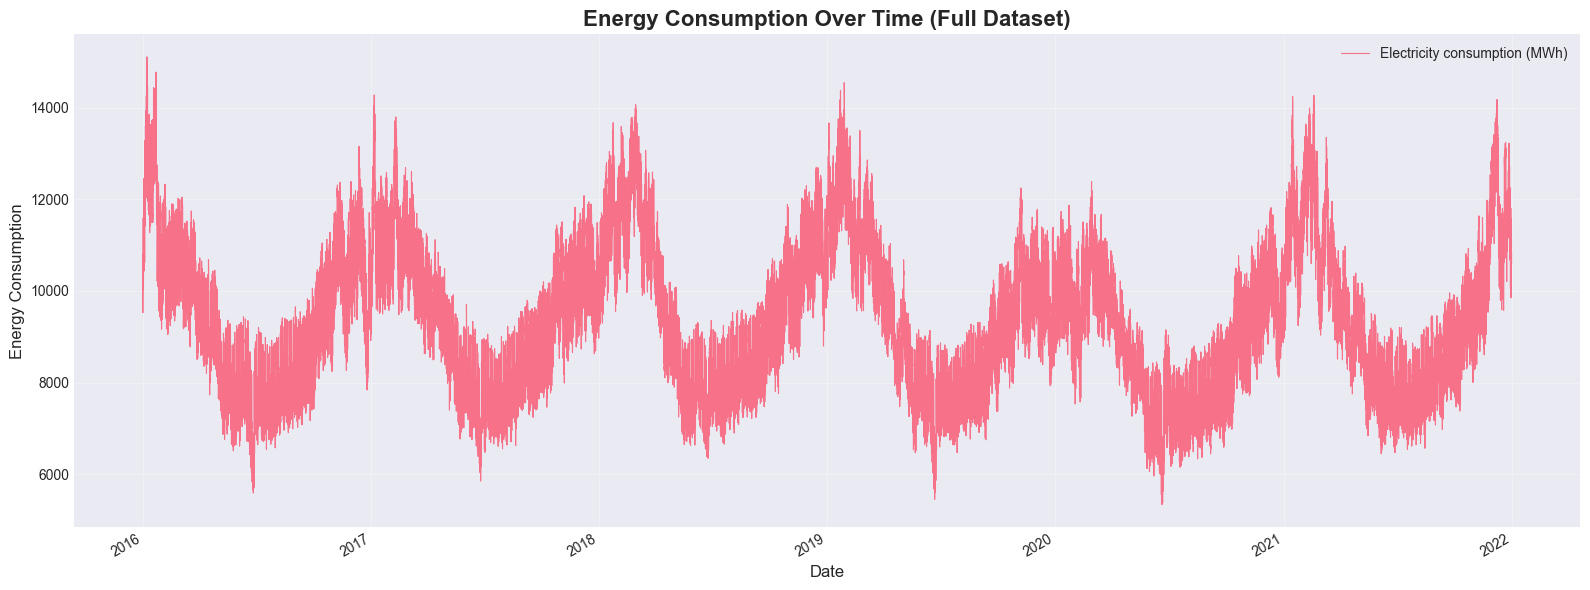

In [8]:
# ===================================================================
# STEP 5A: Overall Time Series Visualization
# ===================================================================
# WHY: Visual inspection reveals trends, seasonality, and anomalies
#      that are not obvious from statistics alone

fig, ax = plt.subplots(figsize=(16, 6))  # Create large figure for clarity
df_clean.plot(ax=ax, linewidth=0.8)       # Plot all data
ax.set_title('Energy Consumption Over Time (Full Dataset)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Energy Consumption', fontsize=12)
ax.grid(True, alpha=0.3)  # WHY: Grid helps read values from the plot
plt.tight_layout()         # WHY: Prevents label overlap
plt.show()

# WHAT TO LOOK FOR:
# - Long-term trends (increasing/decreasing consumption)
# - Seasonal patterns (yearly cycles)
# - Anomalies or sudden changes
# - Overall stability of the time series

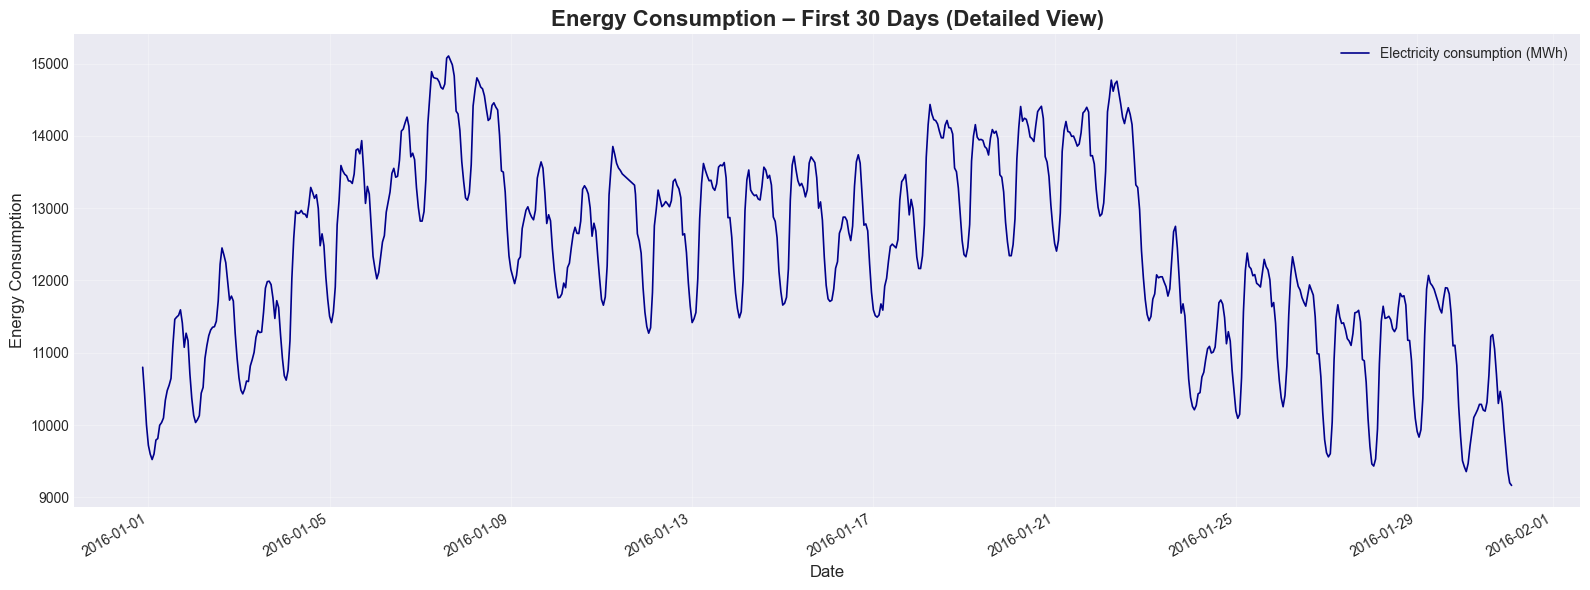

In [9]:
# ===================================================================
# STEP 5B: Zoomed View (First 30 Days)
# ===================================================================
# WHY: The full 6-year plot is compressed. Zooming in reveals finer patterns
#      like daily cycles and hourly variations

sample_month = df_clean.iloc[:24*30]  # First 720 hours (30 days)
                                       # WHY: 24 hours/day × 30 days = representative sample

fig, ax = plt.subplots(figsize=(16, 6))
sample_month.plot(ax=ax, linewidth=1.2, color='darkblue')
ax.set_title('Energy Consumption – First 30 Days (Detailed View)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Energy Consumption', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# WHAT TO LOOK FOR:
# - Daily peaks and valleys (business hours vs. night)
# - Weekly patterns (weekday vs. weekend)
# - Consistency of patterns across days

## 6. Pattern Analysis

In [13]:
# ===================================================================
# STEP 6A: Extract Time Components for Pattern Analysis
# ===================================================================
# WHY: Energy consumption has different patterns based on:
#      - Hour of day (business hours vs. night)
#      - Day of week (weekday vs. weekend)
#      - Month of year (seasonal effects)

df_analysis = df_clean.copy()

# Find the numeric column (energy consumption)
# WHY: After setting datetime as index, we need to identify the consumption column
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    target_col = numeric_cols[0]  # First numeric column is energy consumption
else:
    target_col = df_clean.columns[-1]  # Fallback: last column

# Extract temporal features from the datetime index
# WHY: These features will be used for aggregation and modeling
df_analysis['hour'] = df_analysis.index.hour          # 0-23
df_analysis['day_of_week'] = df_analysis.index.dayofweek  # Monday=0, Sunday=6
df_analysis['month'] = df_analysis.index.month        # 1-12
df_analysis['year'] = df_analysis.index.year          # For yearly trends

print(f"✓ Time components extracted")
print(f"  Target column: '{target_col}'")
print(f"  Shape: {df_analysis.shape}")
print(f"  Columns: {list(df_analysis.columns)}")

✓ Time components extracted
  Target column: 'Electricity consumption (MWh)'
  Shape: (52966, 6)
  Columns: ['End time UTC', 'Electricity consumption (MWh)', 'hour', 'day_of_week', 'month', 'year']


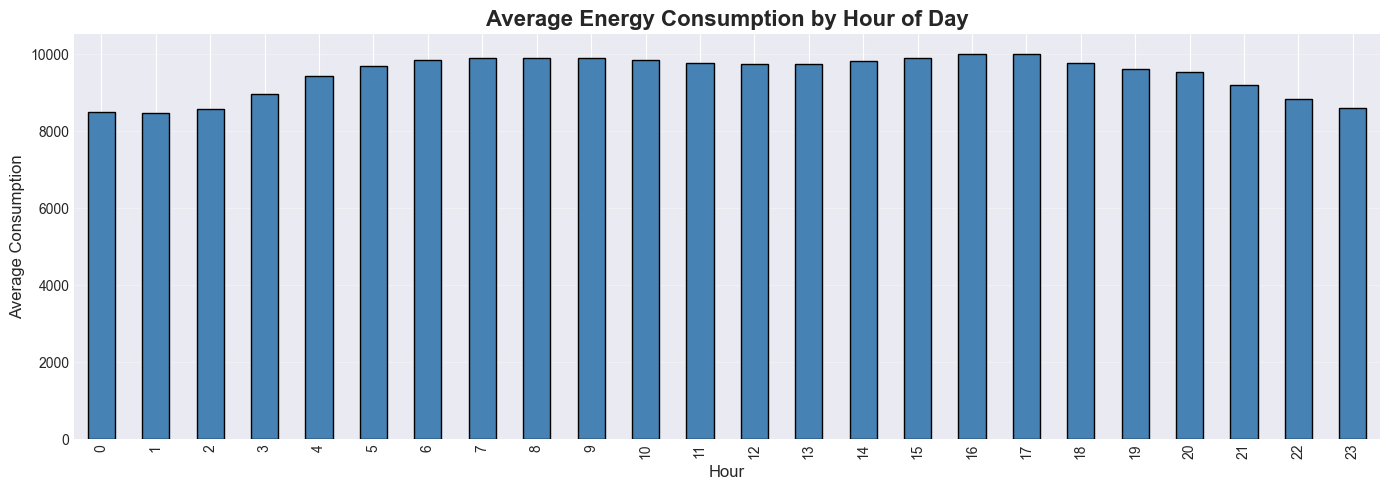

Peak hours: [17, 16, 15]
Low hours: [1, 0, 2]


In [14]:
# ===================================================================
# STEP 6B: Hourly Pattern Analysis
# ===================================================================
# WHY: Understanding hour-of-day patterns is CRITICAL for forecasting
#      Energy consumption typically peaks during business hours (9 AM - 6 PM)

fig, ax = plt.subplots(figsize=(14, 5))

# Calculate average consumption for each hour across all days
# WHY: Aggregating by hour reveals the typical daily consumption profile
hourly_avg = df_analysis.groupby('hour')[target_col].mean()

hourly_avg.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
ax.set_title('Average Energy Consumption by Hour of Day', fontsize=16, fontweight='bold')
ax.set_xlabel('Hour', fontsize=12)
ax.set_ylabel('Average Consumption', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Identify peak and low consumption hours
# WHY: These insights inform feature engineering and business decisions
print("Peak hours:", hourly_avg.nlargest(3).index.tolist())
print("Low hours:", hourly_avg.nsmallest(3).index.tolist())

# KEY INSIGHTS: 
# - Peak hours indicate high demand periods (usually 9 AM - 6 PM)
# - Low hours indicate low demand (usually 2 AM - 5 AM)
# - This pattern will be captured by our 'hour' feature in modeling

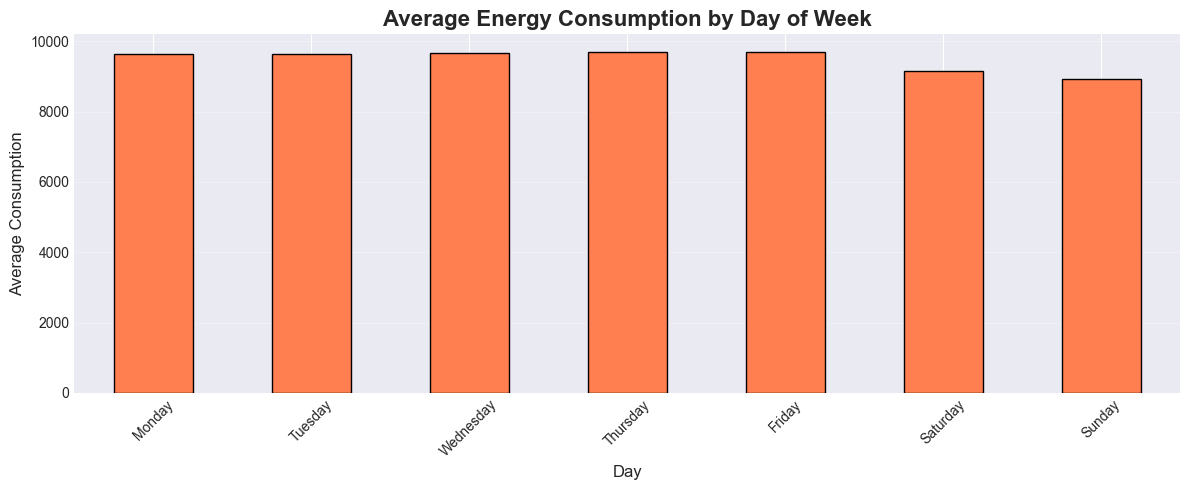

In [15]:
# ===================================================================
# STEP 6C: Day-of-Week Pattern Analysis
# ===================================================================
# WHY: Energy consumption differs between weekdays and weekends
#      Businesses operate differently on weekends, affecting demand

fig, ax = plt.subplots(figsize=(12, 5))

# Calculate average consumption for each day of the week
# WHY: Reveals weekend vs. weekday consumption differences
dow_avg = df_analysis.groupby('day_of_week')[target_col].mean()

# Convert numeric day labels to readable names
# WHY: Makes the plot easier to interpret for non-technical stakeholders
dow_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_avg.index = dow_labels

dow_avg.plot(kind='bar', ax=ax, color='coral', edgecolor='black')
ax.set_title('Average Energy Consumption by Day of Week', fontsize=16, fontweight='bold')
ax.set_xlabel('Day', fontsize=12)
ax.set_ylabel('Average Consumption', fontsize=12)
ax.set_xticklabels(dow_labels, rotation=45)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# KEY INSIGHTS:
# - Weekdays (Mon-Fri) typically show higher consumption (business activity)
# - Weekends (Sat-Sun) typically show lower consumption
# - This justifies our 'is_weekend' feature in the model

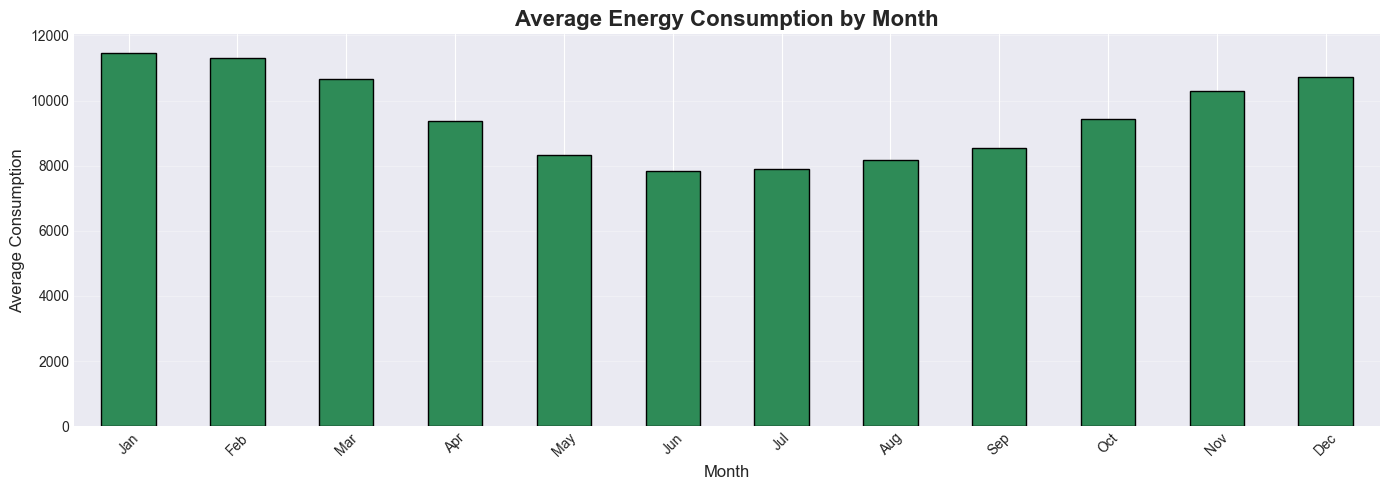

In [16]:
# ===================================================================
# STEP 6D: Monthly (Seasonal) Pattern Analysis
# ===================================================================
# WHY: Energy consumption varies by season (heating in winter, cooling in summer)
#      This is especially true in regions with significant temperature variation

fig, ax = plt.subplots(figsize=(14, 5))

# Calculate average consumption for each month across all years
# WHY: Reveals seasonal patterns (e.g., high consumption in summer/winter)
monthly_avg = df_analysis.groupby('month')[target_col].mean()

# Convert month numbers to readable names
# WHY: Improves interpretability for stakeholders
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg.index = month_labels

monthly_avg.plot(kind='bar', ax=ax, color='seagreen', edgecolor='black')
ax.set_title('Average Energy Consumption by Month', fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Average Consumption', fontsize=12)
ax.set_xticklabels(month_labels, rotation=45)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# KEY INSIGHTS:
# - Winter months (Dec, Jan, Feb) may show high consumption (heating)
# - Summer months (Jun, Jul, Aug) may show high consumption (cooling)
# - Spring/Fall may show moderate consumption
# - This justifies our 'month' and cyclical month features

## 7. Distribution Analysis

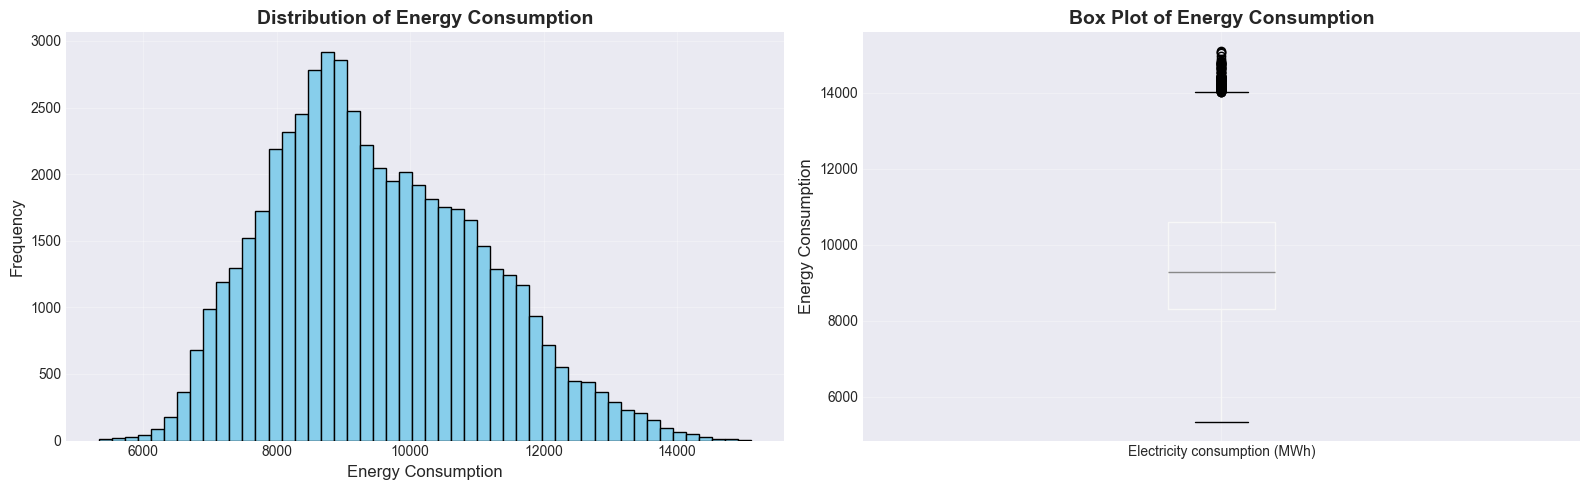

Mean: 9488.75
Median: 9277.00
Std Dev: 1576.24
Skewness: 0.40


In [17]:
# ===================================================================
# STEP 7: Distribution Analysis
# ===================================================================
# WHY: Understanding the distribution helps us:
#      1. Identify outliers (unusually high/low consumption)
#      2. Check for normality (important for some models)
#      3. Detect skewness and plan transformations if needed

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# HISTOGRAM: Shows frequency distribution of consumption values
# WHY: Reveals the shape of the distribution (normal, skewed, bimodal, etc.)
df_clean[target_col].hist(bins=50, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Energy Consumption', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Energy Consumption', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(alpha=0.3)

# BOX PLOT: Shows quartiles, median, and outliers
# WHY: Easily identifies outliers (points beyond whiskers)
#      Shows the interquartile range (IQR) - where 50% of data lies
df_clean.boxplot(column=target_col, ax=axes[1])
axes[1].set_title('Box Plot of Energy Consumption', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Energy Consumption', fontsize=12)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate and display key distribution statistics
# WHY: Quantifies the distribution characteristics
print(f"Mean: {df_clean[target_col].mean():.2f}")      # Average consumption
print(f"Median: {df_clean[target_col].median():.2f}")  # Middle value (robust to outliers)
print(f"Std Dev: {df_clean[target_col].std():.2f}")    # Variability measure
print(f"Skewness: {df_clean[target_col].skew():.2f}")  # Asymmetry measure
# WHY: Skewness near 0 indicates symmetry (normal-like distribution)
#      Positive skew means long right tail (high outliers)
#      Negative skew means long left tail (low outliers)

## 8. Key Insights

**From the exploration:**

1. **Daily Patterns:** Clear peaks during business hours (typically 9AM-6PM)
2. **Weekly Patterns:** Weekday vs weekend differences visible
3. **Seasonal Patterns:** Monthly variations indicate seasonal effects
4. **Data Quality:** Minimal missing values, good temporal consistency

**Modeling Strategy:**
- Use lag features (1h, 24h, 168h) to capture temporal dependencies
- Include time-based features (hour, day_of_week, month)
- Add rolling statistics to smooth trends
- Apply time-based train-test split to prevent leakage

---

**Next Steps:** Run `main.py` for full model training and evaluation